<a href="https://colab.research.google.com/github/Stonetenth2005/Machine-Learning/blob/main/Feature%20Scaling%20-%20Normalization%20%7C%20MinMaxScaling%20%7C%20MaxAbsScaling%20%7C%20RobustScaling/scaling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Wine dataset.csv')
df = df[['class','Alcohol','Malic acid']]

<Axes: xlabel='Alcohol', ylabel='Density'>

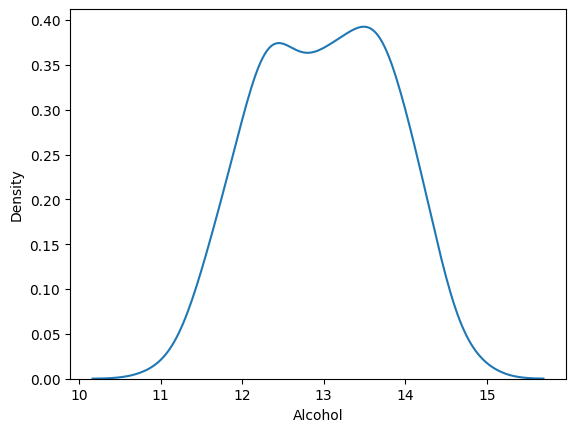

In [ ]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

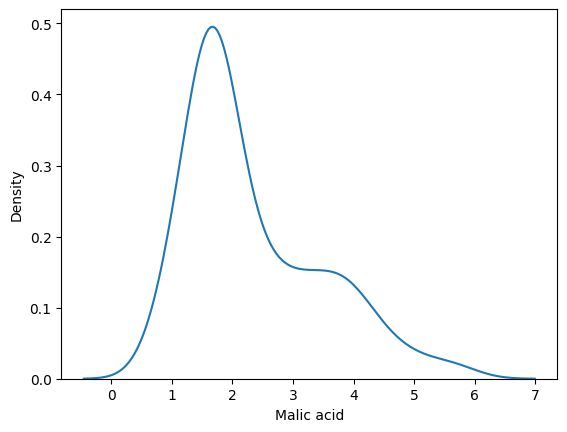

In [ ]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

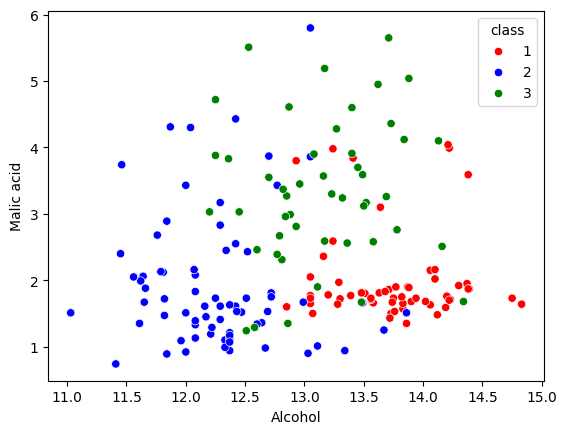

In [ ]:
color_dict = {1:'red',2:'blue',3:'green'}
sns.scatterplot(df, x=df['Alcohol'], y=df['Malic acid'], hue=df['class'], palette=color_dict)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[['Alcohol', 'Malic acid']], df['class'], test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_test_transformed = scaler.transform(X_test)
X_train_transformed = scaler.transform(X_train)

X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_train.columns)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

In [ ]:
np.round(X_test.describe(), 1) # notice the min and max values

,Alcohol,Malic acid
count,54.0,54.0
mean,13.0,2.2
std,0.8,1.1
min,11.4,0.7
25%,12.4,1.6
50%,13.0,1.8
75%,13.7,2.7
max,14.8,5.8


In [ ]:
np.round(X_test_transformed.describe(), 1) # notice the min and max values, now becoming 0 & 1

,Alcohol,Malic acid
count,54.0,54.0
mean,0.5,0.3
std,0.2,0.2
min,0.1,-0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


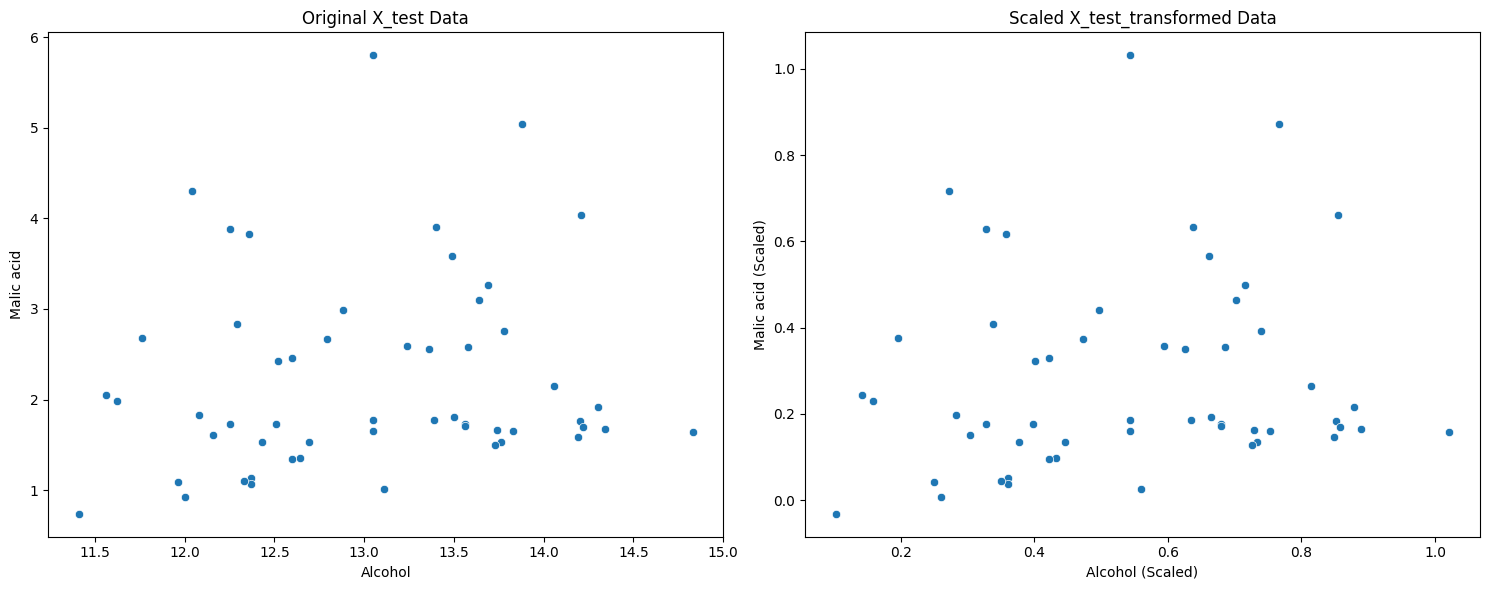

In [ ]:
# This part is generated from gemini, just to compare the features. Notice there is no change in the distribution, only change is the scale of the plot.

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for original X_test
sns.scatterplot(x=X_test['Alcohol'], y=X_test['Malic acid'], ax=axes[0])
axes[0].set_title('Original X_test Data')
axes[0].set_xlabel('Alcohol')
axes[0].set_ylabel('Malic acid')

# Plot for X_test_transformed
sns.scatterplot(x=X_test_transformed['Alcohol'], y=X_test_transformed['Malic acid'], ax=axes[1])
axes[1].set_title('Scaled X_test_transformed Data')
axes[1].set_xlabel('Alcohol (Scaled)')
axes[1].set_ylabel('Malic acid (Scaled)')

plt.tight_layout()
plt.show()

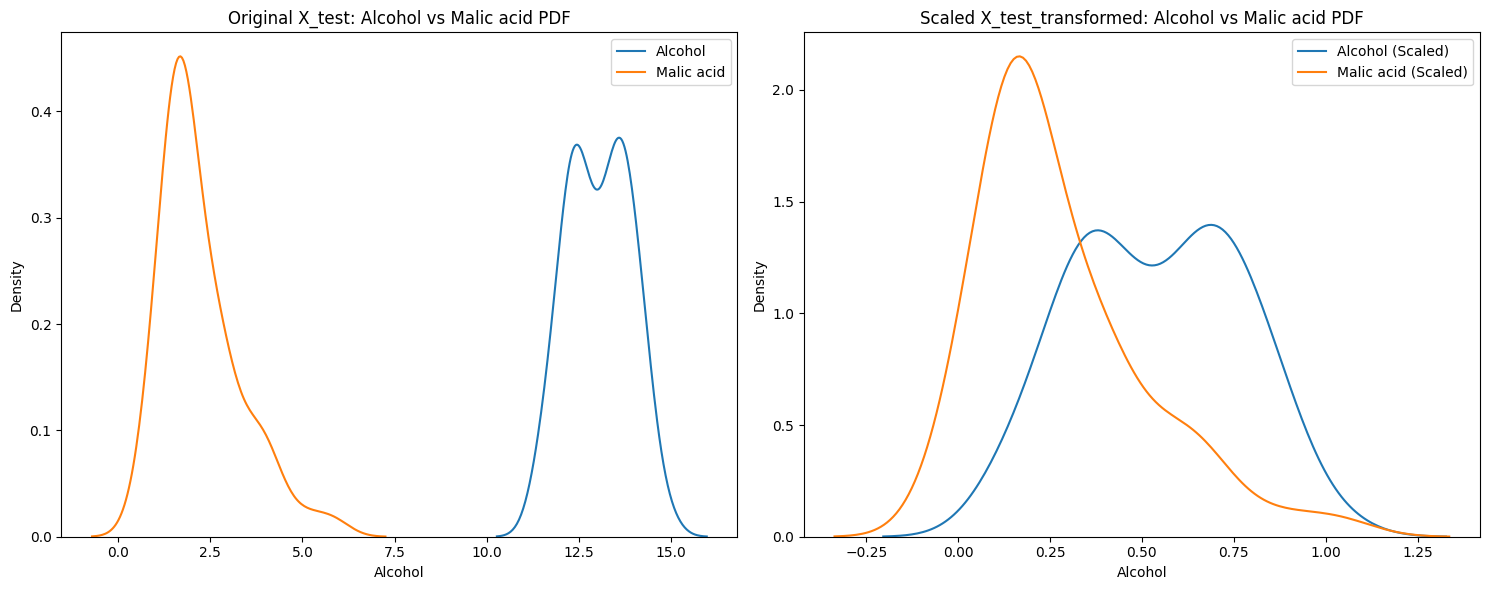

In [ ]:
# This part is generated from gemini, just to compare the features. Note that both features become more comparable after scaling.

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for original X_test: Alcohol vs Malic acid PDF
sns.kdeplot(X_test['Alcohol'], label='Alcohol', ax=axes[0])
sns.kdeplot(X_test['Malic acid'], label='Malic acid', ax=axes[0])
axes[0].set_title('Original X_test: Alcohol vs Malic acid PDF')
axes[0].legend()

# Plot for X_test_transformed: Alcohol vs Malic acid PDF
sns.kdeplot(X_test_transformed['Alcohol'], label='Alcohol (Scaled)', ax=axes[1])
sns.kdeplot(X_test_transformed['Malic acid'], label='Malic acid (Scaled)', ax=axes[1])
axes[1].set_title('Scaled X_test_transformed: Alcohol vs Malic acid PDF')
axes[1].legend()

plt.tight_layout()
plt.show()